I use a service called "Libsyn" to host Data Skeptic.  This is not a formal endorsement, just a fact.  They provide a certain amount of data about downloads, including a summary of downloads by country.

It came as no surprise to me that Data Skeptic is most downloaded in my home country of the United States of America.  But I get a non-trivial amount of downloads from our neighboring nation to the north, which I know has about 10% of our population.  Do I get the most downloads *per capita* in the US?

In [10]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
df = pd.read_csv('show_countries_dataskeptic_2016-01-08.csv')
df.sort('total_downloads', inplace=True, ascending=False)

In [57]:
tail = df[11:].sum()
df = df[0:10]
df = df.append({'country_name': 'Other', 'total_downloads': tail['total_downloads']}, ignore_index=True)
df['downloads_percent'] = df['total_downloads'] / df['total_downloads'].sum() * 100
df['downloads_percent'] = df['downloads_percent'].apply(lambda x: round(x, 2))

In [58]:
df[['country_name', 'downloads_percent']]

,country_name,downloads_percent
0,United States,59.02
1,Australia,6.97
2,United Kingdom,6.60
3,Canada,4.41
4,Germany,2.53
5,Sweden,1.84
6,South Africa,1.48
7,India,1.27
8,Netherlands,1.09
9,France,0.84


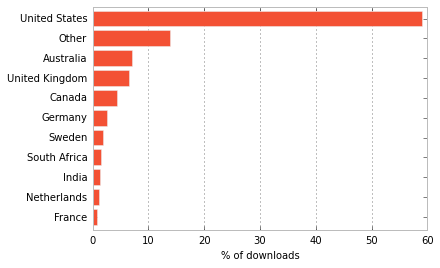

In [69]:
df.sort('total_downloads', inplace=True)
df.index = np.arange(df.shape[0])
plt.barh(df.index, df['downloads_percent'])
plt.gca().yaxis.grid(False)
plt.yticks(df.index + 0.4, df['country_name'])
plt.xlabel('% of downloads')
plt.ylim(-.25, df.shape[0])
plt.show()

In [81]:
# I wish I knew a clean API for this...

# These are the 2013 estimates as provided by Google searc hof "population of ____" on 1/8/2016

populations = []
populations.append({'country_name': 'France', 'population': 66030000})
populations.append({'country_name': 'Netherlands', 'population': 16800000})
populations.append({'country_name': 'India', 'population': 1252000000})
populations.append({'country_name': 'South Africa', 'population': 52980000})
populations.append({'country_name': 'Sweden', 'population': 9593000})
populations.append({'country_name': 'Germany', 'population': 80620000})
populations.append({'country_name': 'Canada', 'population': 35160000})
populations.append({'country_name': 'United Kingdom', 'population': 64100000})
populations.append({'country_name': 'Australia', 'population': 23130000})
populations.append({'country_name': 'United States', 'population': 316500000})
world_population = 7162119434
s = 0
for pop in populations:
    s += pop['population']
other = world_population - s
populations.append({'country_name': 'Other', 'population': other})
df2 = pd.DataFrame(populations)
df = df.merge(df2)
df['per_capita'] = df['total_downloads'] / df['population']

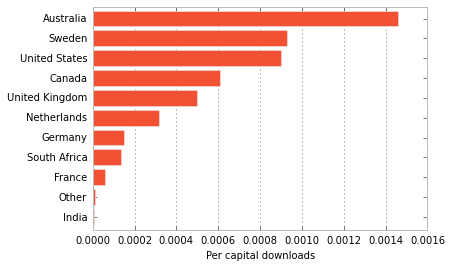

In [89]:
df.sort('per_capita', inplace=True)
df.index = np.arange(df.shape[0])
plt.barh(df.index, df['per_capita'])
plt.yticks(df.index+0.4, df['country_name'])
plt.gca().yaxis.grid(False)
plt.ylim(-.25, df.shape[0])
plt.xlabel('Per capital downloads')
plt.show()

How interesting!  I could write a few pages about my thoughts on why this is, but for now, I'll let the data speak for itself.

And a special thank you to my Australian and Swedish listeners!